In [1]:
import pandas as pd

from oversampling import oversampling_multiclass
from oversampling_multiclass import split_dataset, apply_smote_multiclass, train_random_forest_multiclass, train_svm_multiclass, train_lightgbm, rf_plot_confusion_matrices, svm_plot_confusion_matrices, lightgbm_plot_confusion_matrices

# CLASSIFICAZIONE MULTICLASSE

In [2]:
csv_file_path = 'C:/underwater-classification/features_extraction/audio_features.csv'

In [3]:
df = pd.read_csv(csv_file_path)

In [4]:
df['File Name'] = df['File Name'].str[:-4]
df = df[df['Class'] == 'Target'].copy()

In [6]:
print("Distribuzione delle subclass prima dello split:")
print(df['Subclass'].value_counts())

Distribuzione delle subclass prima dello split:
Subclass
Passengership                       11728
Tanker                              11221
Tug                                 10162
Cargo                                9671
Vessel                                307
Sonar                                  20
Seismic airguns surveys                18
Seal bomb                              17
Echosounder                            14
Underwater Communication Signals        6
Scuba divers                            4
Seafloor fossil fuel processing         4
Acoustic release                        3
Acoustic Harassment Devices             2
Explosion                               2
Fishing pinger                          2
Name: count, dtype: int64


In [7]:
df

,File Name,Class,Subclass,Spectral Centroid Mean,Spectral Bandwidth RMS,Standard Deviation,Skewness,Kurtosis,Shannon Entropy,Renyi Entropy,Rate of Attack,Rate of Decay,Threshold Crossings,Silence Ratio,Mean,Max Over Mean,Min Over Mean,Energy Measurements
7812,AHD_Airmar_seg1,Target,Acoustic Harassment Devices,4477.358083,4252.395919,0.052583,-0.065835,23.613643,3.186076,-7.698312,362.326087,0.009282,23776,0.698419,-0.000042,-17164.64500,16960.625000,0.002765
7813,AHD_Airmar_seg2,Target,Acoustic Harassment Devices,2623.478284,2626.760521,0.041744,-0.095743,81.076911,2.165237,-8.520670,228.392857,0.007694,13548,0.815664,-0.000165,-5967.37500,5275.948000,0.001743
7814,SanctSound_CI04_04_acousticrelease_20200202T07...,Target,Acoustic release,3509.880580,5613.858656,0.060189,1.121935,145.730186,2.333120,-7.910301,338.500000,0.003327,1912,0.815846,-0.000454,-2200.42000,2200.487300,0.003623
7815,SanctSound_CI04_04_acousticrelease_20200202T07...,Target,Acoustic release,2521.859074,5201.373090,0.067112,0.740150,134.817244,2.341261,-7.763672,421.000000,0.004587,4383,0.757898,0.004102,243.77046,-243.777900,0.004521
7816,SanctSound_CI04_04_acousticrelease_20200202T07...,Target,Acoustic release,1209.973836,2659.503763,0.043428,1.686207,264.717755,1.846858,-8.548927,345.000000,0.003038,1761,0.909339,-0.001581,-632.46875,632.488040,0.001888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50988,ship_small_seg5,Target,Vessel,456.747011,797.837269,0.194804,0.013841,0.040806,4.912163,-5.505589,374.087500,0.004186,3257,0.502427,0.010898,67.17063,-71.718500,0.038067
50989,ship_small_seg6,Target,Vessel,452.009912,804.062723,0.187102,0.015867,0.072808,4.923598,-5.597314,374.125000,0.004034,3284,0.499966,0.010380,68.85387,-69.641780,0.035115
50990,ship_small_seg7,Target,Vessel,446.388360,808.959976,0.179071,0.000758,0.094906,4.904681,-5.670921,374.100000,0.003832,3247,0.500477,0.011149,60.26118,-65.437140,0.032191
50991,ship_small_seg8,Target,Vessel,451.316540,794.817133,0.188441,-0.002943,0.136695,4.846811,-5.513616,374.087500,0.004043,3283,0.495841,0.010464,76.87661,-72.440750,0.035620


## SPLIT

In [8]:
X_train_imputed, X_val_imputed, X_test_imputed, y_train_encoded, y_val_encoded, y_test_encoded, subclass_encoder = split_dataset(df)

Dimensione totale dopo il filtraggio: 43089 campioni

Dimensione del set di addestramento: 33872 campioni (78.61%)
Dimensione del set di validazione: 4403 campioni (10.22%)
Dimensione del set di test: 4814 campioni (11.17%)

Distribuzione delle subclass nel set di addestramento:
Subclass
Passengership    8830
Tanker           8744
Tug              8213
Cargo            7802
Vessel            283
Name: count, dtype: int64

Distribuzione delle subclass nel set di validazione:
Subclass
Passengership    1291
Tanker           1276
Tug               956
Cargo             862
Vessel             18
Name: count, dtype: int64

Distribuzione delle subclass nel set di test:
Subclass
Passengership    1607
Tanker           1201
Cargo            1007
Tug               993
Vessel              6
Name: count, dtype: int64


In [9]:
X_train_imputed[['File Name', 'Parent', 'Subclass']].groupby(['Parent', 'File Name']).describe()

Subclass  \
                                                                                   count   
Parent                               File Name                                             
1cc5583b-fe72-4cb2-b64c-563bd87ad91b 1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg1         1   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg10        1   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg11        1   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg12        1   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg13        1   
...                                                                                  ...   
ship_small                           ship_small_seg5                                   1   
                                     ship_small_seg6                                   1   
                                     ship_small_seg7                                   1   
                                     ship_small_seg8                                   1   
                                     ship_small_seg9                                   1   

                                                                                        \
                                                                                unique   
Parent                               File Name                                           
1cc5583b-fe72-4cb2-b64c-563bd87ad91b 1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg1       1   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg10      1   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg11      1   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg12      1   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg13      1   
...                                                                                ...   
ship_small                           ship_small_seg5                                 1   
                                     ship_small_seg6                                 1   
                                     ship_small_seg7                                 1   
                                     ship_small_seg8                                 1   
                                     ship_small_seg9                                 1   

                                                                                                \
                                                                                           top   
Parent                               File Name                                                   
1cc5583b-fe72-4cb2-b64c-563bd87ad91b 1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg1   Passengership   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg10  Passengership   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg11  Passengership   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg12  Passengership   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg13  Passengership   
...                                                                                        ...   
ship_small                           ship_small_seg5                                    Vessel   
                                     ship_small_seg6                                    Vessel   
                                     ship_small_seg7                                    Vessel   
                                     ship_small_seg8                                    Vessel   
                                     ship_small_seg9                                    Vessel   

                                                                                      
                                                                      

In [10]:
X_test_imputed[['File Name', 'Parent','Subclass']].groupby(['Parent', 'File Name']).describe()

Subclass  \
                                                                                                    count   
Parent                                        File Name                                                     
20160516a-9_9                                 20160516a-9_9_seg1                                        1   
                                              20160516a-9_9_seg2                                        1   
                                              20160516a-9_9_seg3                                        1   
20160616b-21_200904                           20160616b-21_200904_seg1                                  1   
                                              20160616b-21_200904_seg10                                 1   
...                                                                                                   ...   
SanctSound_GR01_01_vessel_20181217T204109Z    SanctSound_GR01_01_vessel_20181217T204109Z_seg2           1   
SanctSound_HI04_02_smallboat_20191211T175807Z SanctSound_HI04_02_smallboat_20191211T175807Z_seg1        1   
                                              SanctSound_HI04_02_smallboat_20191211T175807Z_seg2        1   
SanctSound_SB03_09_vessel_20200415T161235Z    SanctSound_SB03_09_vessel_20200415T161235Z_seg1           1   
                                              SanctSound_SB03_09_vessel_20200415T161235Z_seg2           1   

                                                                                                         \
                                                                                                 unique   
Parent                                        File Name                                                   
20160516a-9_9                                 20160516a-9_9_seg1                                      1   
                                              20160516a-9_9_seg2                                      1   
                                              20160516a-9_9_seg3                                      1   
20160616b-21_200904                           20160616b-21_200904_seg1                                1   
                                              20160616b-21_200904_seg10                               1   
...                                                                                                 ...   
SanctSound_GR01_01_vessel_20181217T204109Z    SanctSound_GR01_01_vessel_20181217T204109Z_seg2         1   
SanctSound_HI04_02_smallboat_20191211T175807Z SanctSound_HI04_02_smallboat_20191211T175807Z_seg1      1   
                                              SanctSound_HI04_02_smallboat_20191211T175807Z_seg2      1   
SanctSound_SB03_09_vessel_20200415T161235Z    SanctSound_SB03_09_vessel_20200415T161235Z_seg1         1   
                                              SanctSound_SB03_09_vessel_20200415T161235Z_seg2         1   

                                                                                                                 \
                                                                                                            top   
Parent                                        File Name                                                           
20160516a-9_9                                 20160516a-9_9_seg1                                  Passengership   
                                              20160516a-9_9_seg2                                  Passengership   
                                              20160516a-9_9_seg3                                  Passengership   
20160616b-21_200904                           20160616b-21_200904_seg1                            Passengership   
                                              20160616b-21_200904_seg10                           Passengership   
...                                                                                                         ...   
SanctSound_GR01_01_vessel_20181217T2

In [11]:
X_val_imputed[['File Name', 'Parent','Subclass']].groupby(['Parent', 'File Name']).describe()


Subclass  \
                                                                                          count   
Parent                                   File Name                                                
20160531-7_142749                        20160531-7_142749_seg1                               1   
                                         20160531-7_142749_seg10                              1   
                                         20160531-7_142749_seg100                             1   
                                         20160531-7_142749_seg101                             1   
                                         20160531-7_142749_seg102                             1   
...                                                                                         ...   
SanctSound_OC02_01_ship_20190419T233040Z SanctSound_OC02_01_ship_20190419T233040Z_seg5        1   
                                         SanctSound_OC02_01_ship_20190419T233040Z_seg6        1   
                                         SanctSound_OC02_01_ship_20190419T233040Z_seg7        1   
                                         SanctSound_OC02_01_ship_20190419T233040Z_seg8        1   
                                         SanctSound_OC02_01_ship_20190419T233040Z_seg9        1   

                                                                                               \
                                                                                       unique   
Parent                                   File Name                                              
20160531-7_142749                        20160531-7_142749_seg1                             1   
                                         20160531-7_142749_seg10                            1   
                                         20160531-7_142749_seg100                           1   
                                         20160531-7_142749_seg101                           1   
                                         20160531-7_142749_seg102                           1   
...                                                                                       ...   
SanctSound_OC02_01_ship_20190419T233040Z SanctSound_OC02_01_ship_20190419T233040Z_seg5      1   
                                         SanctSound_OC02_01_ship_20190419T233040Z_seg6      1   
                                         SanctSound_OC02_01_ship_20190419T233040Z_seg7      1   
                                         SanctSound_OC02_01_ship_20190419T233040Z_seg8      1   
                                         SanctSound_OC02_01_ship_20190419T233040Z_seg9      1   

                                                                                                \
                                                                                           top   
Parent                                   File Name                                               
20160531-7_142749                        20160531-7_142749_seg1                         Tanker   
                                         20160531-7_142749_seg10                        Tanker   
                                         20160531-7_142749_seg100                       Tanker   
                                         20160531-7_142749_seg101                       Tanker   
                                         20160531-7_142749_seg102                       Tanker   
...                                                                                        ...   
SanctSound_OC02_01_ship_20190419T233040Z SanctSound_OC02_01_ship_20190419T233040Z_seg5  Vessel   
                                         SanctSound_OC02_01_ship_20190419T233040Z_seg6  Vessel   
                                         SanctSound_OC02_01_ship_20190419T233040Z_seg7  Vessel   
                                         SanctSound_OC02_01_ship_20190419T233040Z_seg8  Vessel   
                                         SanctSound_OC02_01_ship_20

## SMOTE

In [12]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Adatta questo valore al numero di core che desideri utilizzare

In [13]:
X_train_resampled, y_train_resampled = apply_smote_multiclass(X_train_imputed, y_train_encoded, 1)

Distribuzione delle classi nel set di training dopo SMOTE:
1    8830
2    8830
0    8830
3    8830
4    8830
Name: count, dtype: int64


In [14]:
print(pd.Series(subclass_encoder.inverse_transform(y_train_resampled)).value_counts())

Passengership    8830
Tanker           8830
Cargo            8830
Tug              8830
Vessel           8830
Name: count, dtype: int64


In [15]:
print(f"\nDistribuzione delle classi nel set di validation:\n \n{pd.Series(y_val_encoded).value_counts()} ")


Distribuzione delle classi nel set di validation:
 
1    1291
2    1276
3     956
0     862
4      18
Name: count, dtype: int64 


In [16]:

print(f"\nDistribuzione delle classi nel set di test:\n \n{pd.Series(y_test_encoded).value_counts()} ")


Distribuzione delle classi nel set di test:
 
1    1607
2    1201
0    1007
3     993
4       6
Name: count, dtype: int64 


In [17]:
# Stampare le forme dei dataset
print("\nForme dei dataset:")
print(f"Train: {X_train_imputed.shape}") #validation
print(f"Validation: {X_val_imputed.shape}") #validation
print(f"Test: {X_test_imputed.shape}") #test
print(f"Train bilanciato e filtrato: {X_train_resampled.shape}") #train dopo SMOTE


Forme dei dataset:
Train: (33872, 19)
Validation: (4403, 19)
Test: (4814, 19)
Train bilanciato e filtrato: (44150, 15)


# Esperimento 1 

Esperimento effettuato prendendo come riferimento alcune features numeriche da "Malfante et al."

In [18]:
# Rimuovi le colonne non necessarie per evitare errori nei nomi delle feature
X_val_imputed = X_val_imputed.drop(columns=["Class", "File Name", "Parent", "Subclass"], errors='ignore')
X_test_imputed = X_test_imputed.drop(columns=["Class", "File Name", "Parent", "Subclass"], errors='ignore')


### 1.1 Random Forest Model

In [19]:
random_forest_model = train_random_forest_multiclass(X_train_resampled, y_train_resampled, X_val_imputed, y_val_encoded, X_test_imputed, y_test_encoded)

Accuratezza sul Validation Set: 0.4018
Log Loss sul Validation Set: 1.3716

=== Report di Classificazione - Validation Set ===
              precision    recall  f1-score   support

           0       0.26      0.37      0.30       862
           1       0.47      0.26      0.34      1291
           2       0.46      0.44      0.45      1276
           3       0.45      0.56      0.50       956
           4       0.46      1.00      0.63        18

    accuracy                           0.40      4403
   macro avg       0.42      0.53      0.44      4403
weighted avg       0.42      0.40      0.40      4403

Accuratezza sul Test Set: 0.4377
Log Loss sul Test Set: 1.2985

=== Report di Classificazione - Test Set ===
              precision    recall  f1-score   support

           0       0.42      0.46      0.44      1007
           1       0.41      0.23      0.29      1607
           2       0.48      0.49      0.48      1201
           3       0.44      0.69      0.54       993
    

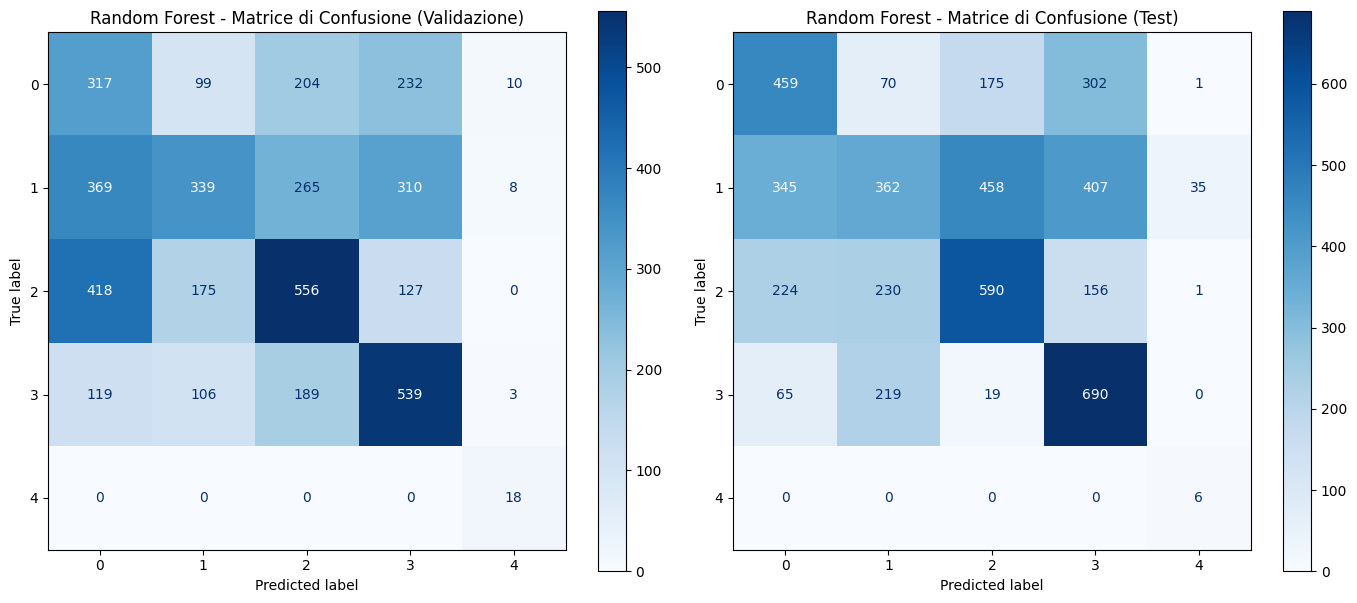

In [20]:
rf_plot_confusion_matrices(random_forest_model, X_val_imputed, y_val_encoded, X_test_imputed, y_test_encoded)


### 1.2 SVM Model

In [21]:
svm_model = train_svm_multiclass(X_train_resampled, y_train_resampled, X_val_imputed, y_val_encoded, X_test_imputed, y_test_encoded)

Distribuzione delle classi reali nel set di validazione: [ 862 1291 1276  956   18]
Distribuzione delle classi predette nel set di validazione: [ 979  386  267 2702   69]
Report di classificazione del set di validazione:
              precision    recall  f1-score   support

           0       0.11      0.12      0.11       862
           1       0.32      0.09      0.15      1291
           2       0.56      0.12      0.19      1276
           3       0.19      0.54      0.28       956
           4       0.26      1.00      0.41        18

    accuracy                           0.21      4403
   macro avg       0.29      0.37      0.23      4403
weighted avg       0.32      0.21      0.18      4403

Accuratezza sul set di validazione: 0.2071
Distribuzione delle classi reali nel set di test: [1007 1607 1201  993    6]
Distribuzione delle classi predette nel set di test: [1022  592  434 2658  108]
Report di classificazione del set di test:
              precision    recall  f1-score   s

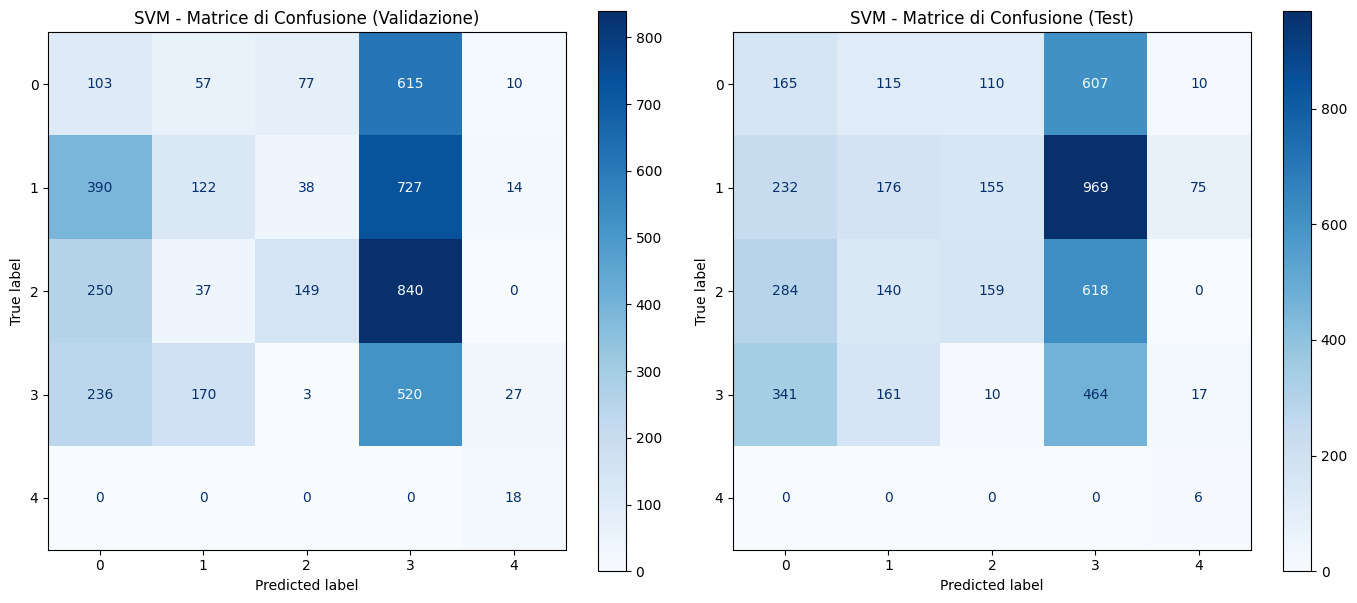

In [22]:
svm_plot_confusion_matrices(svm_model, X_val_imputed, y_val_encoded, X_test_imputed, y_test_encoded)

### 1.3 LightGBM Model

In [23]:
lightgbm_model = train_lightgbm(X_train_resampled, y_train_resampled, X_val_imputed, y_val_encoded, X_test_imputed, y_test_encoded)

Dimensioni dopo NaN nel set di addestramento: X_train: (44150, 15), y_train: (44150,)
Dimensioni dopo NaN nel set di validazione: X_val: (4403, 15), y_val: (4403,)
Dimensioni dopo NaN nel set di test: X_test: (4814, 15), y_test: (4814,)
Classi nel set di addestramento: [0 1 2 3 4]
Classi nel set di validazione: [0 1 2 3 4]
Classi nel set di test: [0 1 2 3 4]
Report di classificazione del set di validazione:
              precision    recall  f1-score   support

           0       0.23      0.29      0.26       862
           1       0.45      0.36      0.40      1291
           2       0.39      0.42      0.40      1276
           3       0.54      0.49      0.51       956
           4       0.51      1.00      0.68        18

    accuracy                           0.39      4403
   macro avg       0.42      0.51      0.45      4403
weighted avg       0.41      0.39      0.40      4403

Accuratezza sul set di validazione: 0.3950
Report di classificazione del set di test:
              

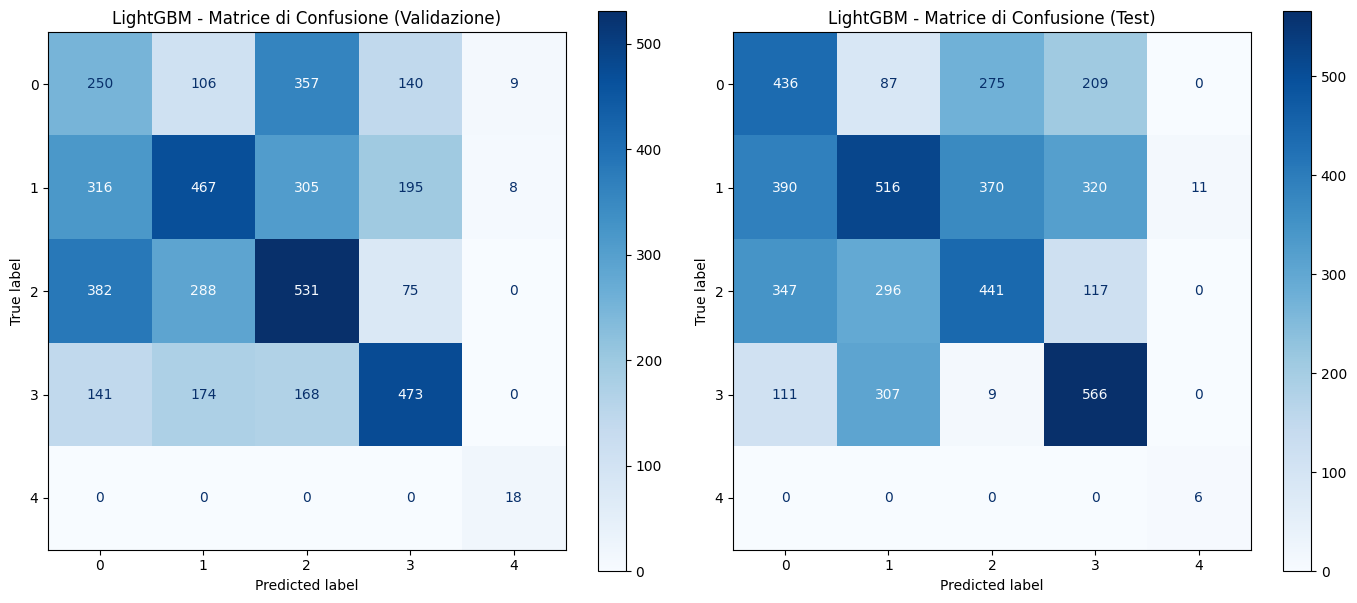

In [24]:
lightgbm_plot_confusion_matrices(lightgbm_model, X_val_imputed, y_val_encoded, X_test_imputed, y_test_encoded)

## Esperimento 2

Esperimento effettuato prendendo come riferimento alcune features numeriche da “BirdNet”

In [25]:
csv_file_path_exp1 = 'C:/underwater-classification/features_extraction/exp1_audio_features.csv'
df_exp1 = pd.read_csv(csv_file_path_exp1)

In [26]:
df_exp1 = df_exp1[df_exp1['Class'] == 'Target'].copy()

In [27]:
X_train_imputed_exp1, X_val_imputed_exp1, X_test_imputed_exp1, y_train_encoded_exp1, y_val_encoded_exp1, y_test_encoded_exp1, subclass_encoder_exp1 = split_dataset(df_exp1)
X_train_resampled_exp1, y_train_resampled_exp1 = apply_smote_multiclass(X_train_imputed_exp1, y_train_encoded_exp1, 1)

Dimensione totale dopo il filtraggio: 43089 campioni

Dimensione del set di addestramento: 33872 campioni (78.61%)
Dimensione del set di validazione: 4403 campioni (10.22%)
Dimensione del set di test: 4814 campioni (11.17%)

Distribuzione delle subclass nel set di addestramento:
Subclass
Passengership    8830
Tanker           8744
Tug              8213
Cargo            7802
Vessel            283
Name: count, dtype: int64

Distribuzione delle subclass nel set di validazione:
Subclass
Passengership    1291
Tanker           1276
Tug               956
Cargo             862
Vessel             18
Name: count, dtype: int64

Distribuzione delle subclass nel set di test:
Subclass
Passengership    1607
Tanker           1201
Cargo            1007
Tug               993
Vessel              6
Name: count, dtype: int64
Distribuzione delle classi nel set di training dopo SMOTE:
1    8830
2    8830
0    8830
3    8830
4    8830
Name: count, dtype: int64


In [28]:
# Rimuovi le colonne non necessarie per evitare errori nei nomi delle feature
X_val_imputed_exp1 = X_val_imputed_exp1.drop(columns=["Class", "File Name", "Parent", "Subclass"], errors='ignore')
X_test_imputed_exp1 = X_test_imputed_exp1.drop(columns=["Class", "File Name", "Parent", "Subclass"], errors='ignore')

### 2.1 Random Forest Model

In [29]:
random_forest_model_exp1 = train_random_forest_multiclass(X_train_resampled_exp1, y_train_resampled_exp1, X_val_imputed_exp1, y_val_encoded_exp1, X_test_imputed_exp1, y_test_encoded_exp1)

Accuratezza sul Validation Set: 0.5335
Log Loss sul Validation Set: 1.1673

=== Report di Classificazione - Validation Set ===
              precision    recall  f1-score   support

           0       0.42      0.45      0.43       862
           1       0.58      0.36      0.45      1291
           2       0.53      0.68      0.59      1276
           3       0.63      0.63      0.63       956
           4       0.45      1.00      0.62        18

    accuracy                           0.53      4403
   macro avg       0.52      0.63      0.54      4403
weighted avg       0.54      0.53      0.53      4403

Accuratezza sul Test Set: 0.4846
Log Loss sul Test Set: 1.1708

=== Report di Classificazione - Test Set ===
              precision    recall  f1-score   support

           0       0.48      0.30      0.37      1007
           1       0.49      0.42      0.46      1607
           2       0.52      0.51      0.52      1201
           3       0.45      0.73      0.56       993
    

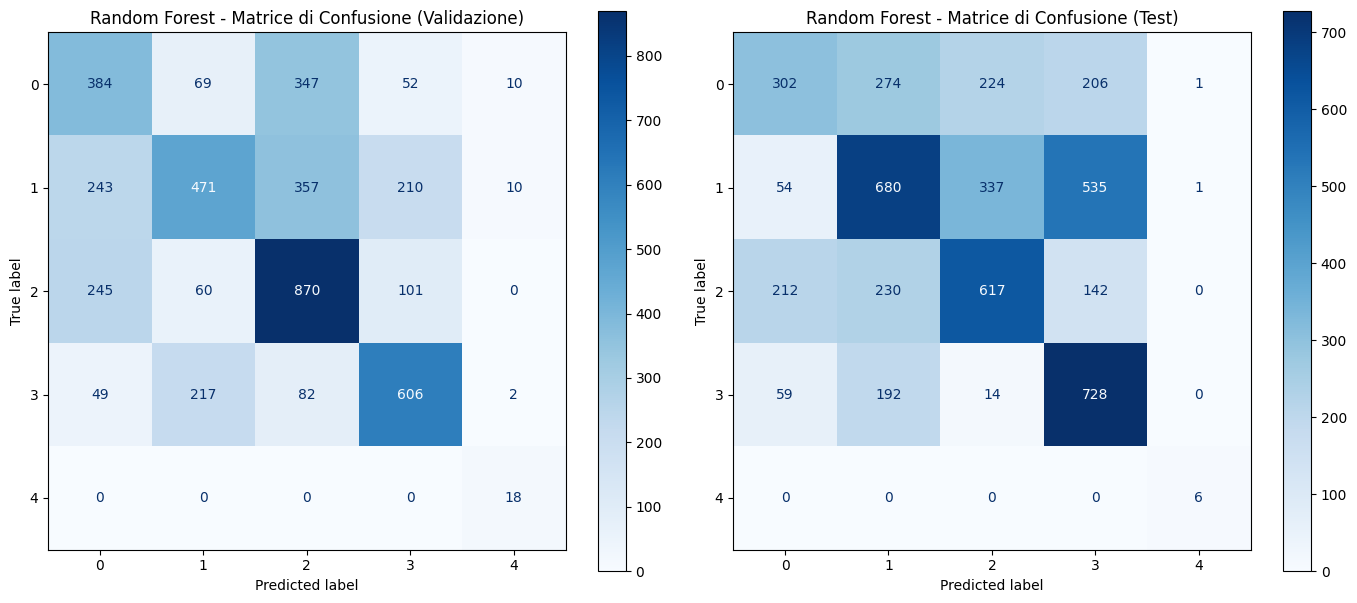

In [30]:
rf_plot_confusion_matrices(random_forest_model_exp1, X_val_imputed_exp1, y_val_encoded_exp1, X_test_imputed_exp1, y_test_encoded_exp1)

### 2.2 SVM Model

In [31]:
svm_model_exp1 = train_svm_multiclass(X_train_resampled_exp1, y_train_resampled_exp1, X_val_imputed_exp1, y_val_encoded_exp1, X_test_imputed_exp1, y_test_encoded_exp1)

Distribuzione delle classi reali nel set di validazione: [ 862 1291 1276  956   18]
Distribuzione delle classi predette nel set di validazione: [ 966  520  967 1897   53]
Report di classificazione del set di validazione:
              precision    recall  f1-score   support

           0       0.19      0.21      0.20       862
           1       0.37      0.15      0.21      1291
           2       0.53      0.40      0.46      1276
           3       0.35      0.70      0.47       956
           4       0.15      0.44      0.23        18

    accuracy                           0.36      4403
   macro avg       0.32      0.38      0.31      4403
weighted avg       0.38      0.36      0.34      4403

Accuratezza sul set di validazione: 0.3554
Distribuzione delle classi reali nel set di test: [1007 1607 1201  993    6]
Distribuzione delle classi predette nel set di test: [1005  903 1211 1609   86]
Report di classificazione del set di test:
              precision    recall  f1-score   s

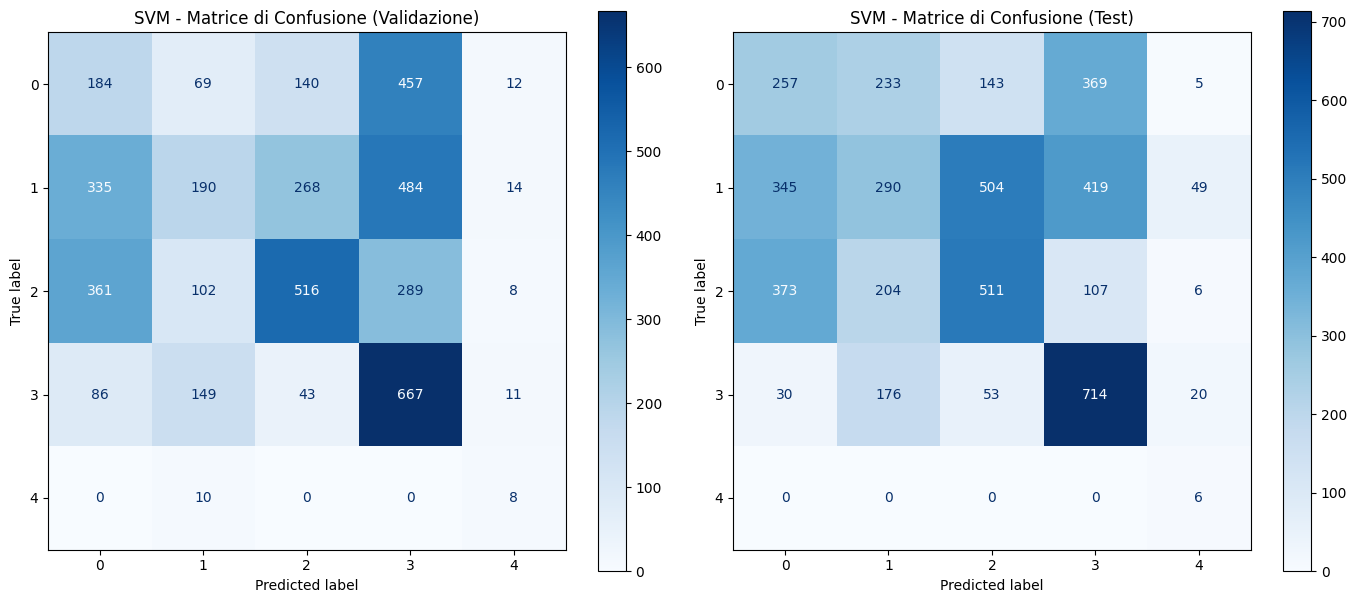

In [32]:
svm_plot_confusion_matrices(svm_model_exp1, X_val_imputed_exp1, y_val_encoded_exp1, X_test_imputed_exp1, y_test_encoded_exp1)

### 2.3 LightGBM Model

In [33]:
lightgbm_model_exp1 = train_lightgbm(X_train_resampled_exp1, y_train_resampled_exp1, X_val_imputed_exp1, y_val_encoded_exp1, X_test_imputed_exp1, y_test_encoded_exp1)

Dimensioni dopo NaN nel set di addestramento: X_train: (44150, 28), y_train: (44150,)
Dimensioni dopo NaN nel set di validazione: X_val: (4403, 28), y_val: (4403,)
Dimensioni dopo NaN nel set di test: X_test: (4814, 28), y_test: (4814,)
Classi nel set di addestramento: [0 1 2 3 4]
Classi nel set di validazione: [0 1 2 3 4]
Classi nel set di test: [0 1 2 3 4]
Report di classificazione del set di validazione:
              precision    recall  f1-score   support

           0       0.40      0.51      0.45       862
           1       0.54      0.43      0.48      1291
           2       0.48      0.55      0.52      1276
           3       0.70      0.53      0.60       956
           4       0.27      1.00      0.43        18

    accuracy                           0.51      4403
   macro avg       0.48      0.61      0.50      4403
weighted avg       0.53      0.51      0.51      4403

Accuratezza sul set di validazione: 0.5081
Report di classificazione del set di test:
              

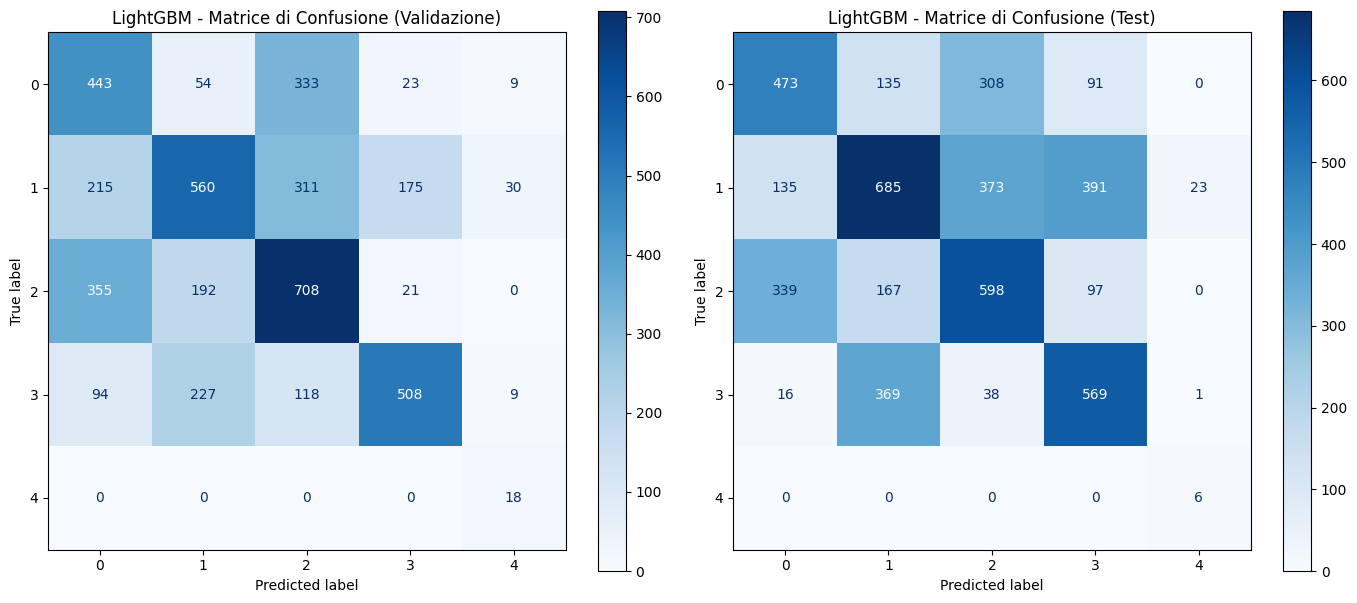

In [34]:
lightgbm_plot_confusion_matrices(lightgbm_model_exp1, X_val_imputed_exp1, y_val_encoded_exp1, X_test_imputed_exp1, y_test_encoded_exp1)

## Esperimento 3

Esperimento effettuato prendendo come riferimento features numeriche da "A Survey on Audio Feature Extraction for Automatic Music Genre Classification" di Dhamodaran et al.

In [35]:
csv_file_path_exp2 = 'C:/underwater-classification/features_extraction/exp2_audio_features.csv'
df_exp2 = pd.read_csv(csv_file_path_exp2)
df_exp2 = df_exp2[df_exp2['Class'] == 'Target'].copy()

In [36]:
X_train_imputed_exp2, X_val_imputed_exp2, X_test_imputed_exp2, y_train_encoded_exp2, y_val_encoded_exp2, y_test_encoded_exp2, subclass_encoder_exp2 = split_dataset(df_exp2)
X_train_resampled_exp2, y_train_resampled_exp2 = apply_smote_multiclass(X_train_imputed_exp2, y_train_encoded_exp2, 1)

# Rimuovi le colonne non necessarie per evitare errori nei nomi delle feature
X_val_imputed_exp2 = X_val_imputed_exp2.drop(columns=["Class", "File Name", "Parent", "Subclass"], errors='ignore')
X_test_imputed_exp2 = X_test_imputed_exp2.drop(columns=["Class", "File Name", "Parent", "Subclass"], errors='ignore')

Dimensione totale dopo il filtraggio: 43089 campioni

Dimensione del set di addestramento: 33872 campioni (78.61%)
Dimensione del set di validazione: 4403 campioni (10.22%)
Dimensione del set di test: 4814 campioni (11.17%)

Distribuzione delle subclass nel set di addestramento:
Subclass
Passengership    8830
Tanker           8744
Tug              8213
Cargo            7802
Vessel            283
Name: count, dtype: int64

Distribuzione delle subclass nel set di validazione:
Subclass
Passengership    1291
Tanker           1276
Tug               956
Cargo             862
Vessel             18
Name: count, dtype: int64

Distribuzione delle subclass nel set di test:
Subclass
Passengership    1607
Tanker           1201
Cargo            1007
Tug               993
Vessel              6
Name: count, dtype: int64
Distribuzione delle classi nel set di training dopo SMOTE:
1    8830
2    8830
0    8830
3    8830
4    8830
Name: count, dtype: int64


### 3.1 Random Forest Model

In [37]:
random_forest_model_exp2 = train_random_forest_multiclass(X_train_resampled_exp2, y_train_resampled_exp2, X_val_imputed_exp2, y_val_encoded_exp2, X_test_imputed_exp2, y_test_encoded_exp2)

Accuratezza sul Validation Set: 0.5226
Log Loss sul Validation Set: 1.1298

=== Report di Classificazione - Validation Set ===
              precision    recall  f1-score   support

           0       0.38      0.45      0.41       862
           1       0.55      0.31      0.40      1291
           2       0.51      0.64      0.57      1276
           3       0.67      0.70      0.68       956
           4       0.50      1.00      0.67        18

    accuracy                           0.52      4403
   macro avg       0.52      0.62      0.55      4403
weighted avg       0.53      0.52      0.51      4403

Accuratezza sul Test Set: 0.4861
Log Loss sul Test Set: 1.1159

=== Report di Classificazione - Test Set ===
              precision    recall  f1-score   support

           0       0.48      0.37      0.42      1007
           1       0.46      0.34      0.39      1607
           2       0.51      0.55      0.53      1201
           3       0.48      0.76      0.59       993
    

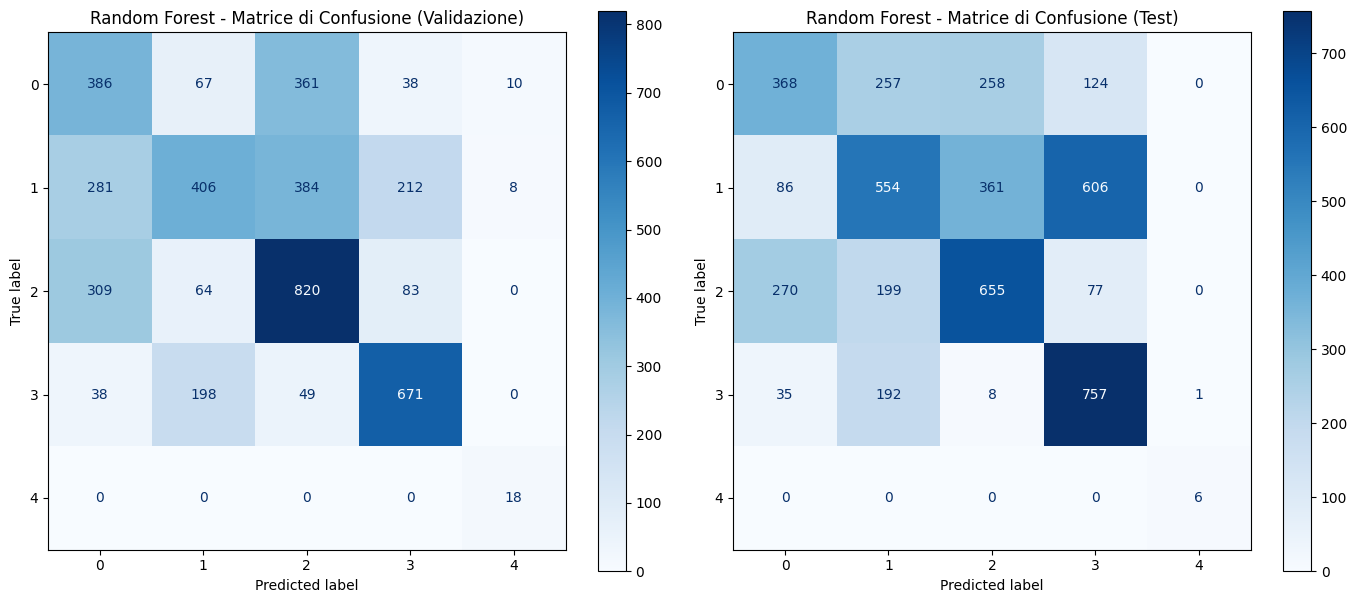

In [38]:
rf_plot_confusion_matrices(random_forest_model_exp2, X_val_imputed_exp2, y_val_encoded_exp2, X_test_imputed_exp2, y_test_encoded_exp2)

### 3.2 SVM Model

In [39]:
svm_model_exp2 = train_svm_multiclass(X_train_resampled_exp2, y_train_resampled_exp2, X_val_imputed_exp2, y_val_encoded_exp2, X_test_imputed_exp2, y_test_encoded_exp2)

Distribuzione delle classi reali nel set di validazione: [ 862 1291 1276  956   18]
Distribuzione delle classi predette nel set di validazione: [1186  509 1387 1283   38]
Report di classificazione del set di validazione:
              precision    recall  f1-score   support

           0       0.43      0.59      0.50       862
           1       0.57      0.23      0.32      1291
           2       0.59      0.65      0.62      1276
           3       0.59      0.79      0.67       956
           4       0.47      1.00      0.64        18

    accuracy                           0.54      4403
   macro avg       0.53      0.65      0.55      4403
weighted avg       0.55      0.54      0.52      4403

Accuratezza sul set di validazione: 0.5435
Distribuzione delle classi reali nel set di test: [1007 1607 1201  993    6]
Distribuzione delle classi predette nel set di test: [ 823 1208 1226 1540   17]
Report di classificazione del set di test:
              precision    recall  f1-score   s

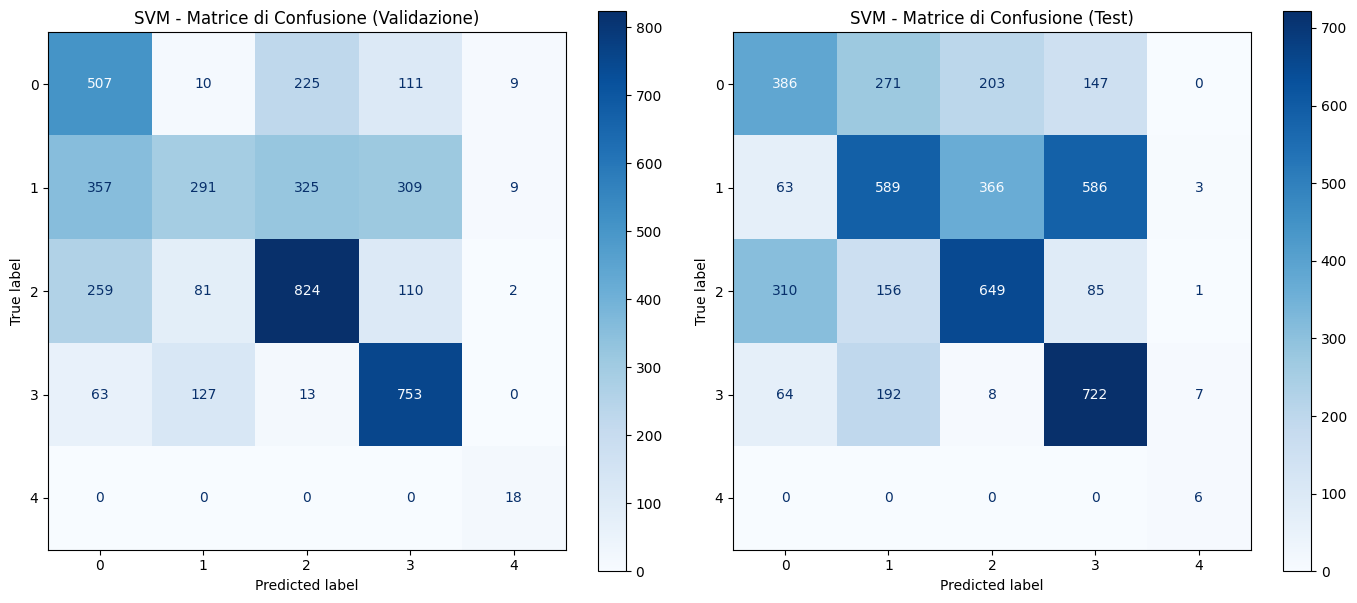

In [40]:
svm_plot_confusion_matrices(svm_model_exp2, X_val_imputed_exp2, y_val_encoded_exp2, X_test_imputed_exp2, y_test_encoded_exp2)

### 3.3 LightGBM Model

In [41]:
lightgbm_model_exp2 = train_lightgbm(X_train_resampled_exp2, y_train_resampled_exp2, X_val_imputed_exp2, y_val_encoded_exp2, X_test_imputed_exp2, y_test_encoded_exp2)

Dimensioni dopo NaN nel set di addestramento: X_train: (44150, 34), y_train: (44150,)
Dimensioni dopo NaN nel set di validazione: X_val: (4403, 34), y_val: (4403,)
Dimensioni dopo NaN nel set di test: X_test: (4814, 34), y_test: (4814,)
Classi nel set di addestramento: [0 1 2 3 4]
Classi nel set di validazione: [0 1 2 3 4]
Classi nel set di test: [0 1 2 3 4]
Report di classificazione del set di validazione:
              precision    recall  f1-score   support

           0       0.40      0.52      0.45       862
           1       0.53      0.45      0.49      1291
           2       0.48      0.56      0.52      1276
           3       0.68      0.47      0.56       956
           4       0.41      1.00      0.58        18

    accuracy                           0.50      4403
   macro avg       0.50      0.60      0.52      4403
weighted avg       0.52      0.50      0.51      4403

Accuratezza sul set di validazione: 0.5033
Report di classificazione del set di test:
              

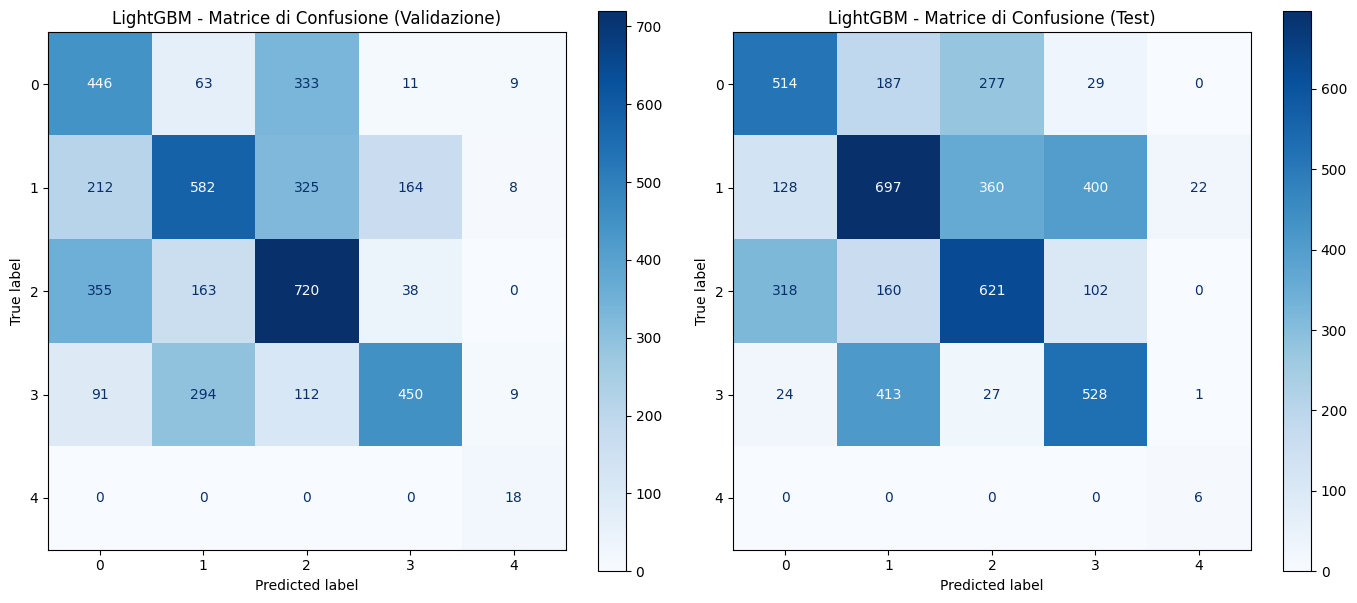

In [42]:
lightgbm_plot_confusion_matrices(lightgbm_model_exp2, X_val_imputed_exp2, y_val_encoded_exp2, X_test_imputed_exp2, y_test_encoded_exp2)